<a href="https://colab.research.google.com/github/Mystorius/project_terror/blob/master/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedShuffleSplit

In [76]:
def get_train_test():
    file = 'data_ml2.csv'
    df = pd.read_csv(file, sep=";", header=0, encoding="ISO-8859-1", low_memory=False)
    df = df[df.gname != 'Unknown']
    df_X = df.drop(['gname','Unnamed: 0'], axis=1)
#     df_X = df.drop(['gname','Unnamed: 0', 'longitude', 'latitude'], axis=1)
#     df_X = df.drop(['gname','Unnamed: 0', 'weaptype3', 'nhostkid', 'weaptype2', 'property', 'propextent', 'weaptype1', 'nperps', 'region'], axis=1)
    df_y = df['gname'].values
    
    label_encoder = LabelEncoder()
    df_y_int = label_encoder.fit_transform(df_y)
    
    return train_test_split(df_X, df_y, test_size=0.33, random_state=42, stratify=None, shuffle=True)
#     sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
#     for train_index, test_index in sss.split(df_X, df_y):
#       print("TRAIN:", train_index, "TEST:", test_index)
#       X_train, X_test = X[train_index], X[test_index]
#       y_train, y_test = y[train_index], y[test_index]

X_train, X_test, y_train, y_test = get_train_test()
X_train = X_train.values
print(np.unique(y_train).shape)
print(np.unique(y_test).shape)

(2893,)
(2040,)


In [0]:

X_train, X_test, y_train, y_test = get_train_test()
X_train = X_train.values

# Create a random forest Classifier. By convention, clf means 'Classifier'
# clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
#             oob_score=False, random_state=42, verbose=0,
#             warm_start=False)

clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
            max_depth=73, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_pred = clf.predict(X_test)

score = clf.score(X_train, y_train)
print('TRAIN ', score)

score = clf.score(X_test, y_test)
print('TEST ', score)

score = accuracy_score(y_test, y_pred)
print('TEST2 ', score)

errors = 0
correct = 0
for i in range(0, len(y_pred)):
  if y_pred[i] == y_test[i]:
    correct += 1
  else:
    errors += 1
print(errors, correct, errors+correct)
print('TEST3 ', correct/len(y_pred))

In [72]:
## London 2017 borough market
X_train, X_test, y_train, y_test = get_train_test()
print(X_train.columns)
own_test = np.array([6, 3, 603, 8, 51.508297, -0.087703,
       2, 18, 97, 216, 3, 9, 9, 10, 11, 48, 0,
       3, 0]).reshape(1, 19)
print(own_test.shape)
y_pred_own = clf.predict_proba(own_test)
print(y_pred_own)

result = []
for i, j in (zip(clf.classes_, clf.predict_proba(own_test)[0])):
  if j > 0:
    result.append([i, j])
print(sorted(result, key=lambda x: x[1], reverse=True))

Index(['imonth', 'iday', 'country', 'region', 'latitude', 'longitude',
       'attacktype1', 'targtype1', 'targsubtype1', 'natlty1', 'nperps',
       'weaptype1', 'weaptype2', 'weaptype3', 'nkill', 'nwound', 'property',
       'propextent', 'nhostkid'],
      dtype='object')
(1, 19)
[[0. 0. 0. ... 0. 0. 0.]]
[['Al-Qaida', 0.1525925925925926], ['Muslim extremists', 0.1455026455026455], ['Anti-Muslim extremists', 0.05952380952380952], ['White extremists', 0.049444444444444444], ['Jihadi-inspired extremists', 0.04481481481481482], ['Basque Fatherland and Freedom (ETA)', 0.044444444444444446], ["Kurdistan Workers' Party (PKK)", 0.043333333333333335], ['Islamic State of Iraq and the Levant (ISIL)', 0.035555555555555556], ['Salafia Jihadia', 0.03333333333333333], ['Hofstad Network', 0.024444444444444446], ['Incel extremists', 0.02222222222222222], ['Red Hand Defenders (RHD)', 0.02222222222222222], ['Ulster Volunteer Force (UVF)', 0.02222222222222222], ['Real Irish Republican Army (RIRA)', 0.

In [73]:
## Paris 2015 baclara theater
X_train, X_test, y_train, y_test = get_train_test()
print(X_train.columns)
own_test = np.array([11, 13, 69, 8, 48.862883, 2.370326,
       2, 14, 81, 69, 9, 5, 6, 5, 137, 413, 0,
       3, 12]).reshape(1, 19)
print(own_test.shape)
y_pred_own = clf.predict_proba(own_test)
print(y_pred_own)

result = []
for i, j in (zip(clf.classes_, clf.predict_proba(own_test)[0])):
  if j > 0:
    result.append([i, j])
print(sorted(result, key=lambda x: x[1], reverse=True))

Index(['imonth', 'iday', 'country', 'region', 'latitude', 'longitude',
       'attacktype1', 'targtype1', 'targsubtype1', 'natlty1', 'nperps',
       'weaptype1', 'weaptype2', 'weaptype3', 'nkill', 'nwound', 'property',
       'propextent', 'nhostkid'],
      dtype='object')
(1, 19)
[[0. 0. 0. ... 0. 0. 0.]]
[['Jihadi-inspired extremists', 0.3123015873015873], ['Islamic State of Iraq and the Levant (ISIL)', 0.10939153439153439], ['Right-wing extremists', 0.0955026455026455], ['Murle Tribe', 0.06666666666666667], ['Al-Qaida', 0.05714285714285714], ['Muslim extremists', 0.05648148148148148], ['Basque Fatherland and Freedom (ETA)', 0.04444444444444444], ["Kurdistan Workers' Party (PKK)", 0.030264550264550265], ['Corsican National Liberation Front (FLNC)', 0.02222222222222222], ['Jewish Defense League (JDL)', 0.02222222222222222], ["Militant People's Revolutionary Forces", 0.021666666666666667], ['Red Brigades Fighting Communist Union (BR-UCC)', 0.021666666666666667], ['Dissident Republica

In [27]:
X_train, X_test, y_train, y_test = get_train_test()
X_train = X_train.values

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
            max_depth=73, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=True)
acc = []
for i in range(10):
  clf.fit(X_train, y_train)
  clf.n_estimators += 1
  acc.append(clf.score(X_test, y_test))
_ = plt.plot(acc, '-r')

# clean_div = []
# for i in range(1, int(X_train.shape[0])):
#     if X_train.shape[0] % i == 0:
#         clean_div.append(i)
# print(clean_div)
# BATCH_SIZE = 551
# NO_BATCHES = np.round(X_train.shape[0] / BATCH_SIZE)
# UPDATE = int(np.round(NO_BATCHES / 10))

# for batch in range(0, int(NO_BATCHES)):
#     start_ = batch * BATCH_SIZE + 1
#     end_ = batch * BATCH_SIZE + BATCH_SIZE
#     x_batch = X_train[start_:end_, :]
#     y_batch = y_train[start_:end_]
#     print(x_batch.shape, y_batch.shape)

#     clf.fit(x_batch, y_batch)
#     clf.n_estimators += 1
    
#     if batch % UPDATE == 0:
#         y_pred = clf.predict(X_test)

#         score = clf.score(X_train, y_train)
#         print('TRAIN ', score)

#         score = clf.score(X_test, y_test)
#         print('TEST ', score)

# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_pred = clf.predict(X_test)

score = clf.score(X_train, y_train)
print('TRAIN ', score)

score = clf.score(X_test, y_test)
print('TEST ', score)

score = accuracy_score(y_test, y_pred)
print('TEST2 ', score)

[1, 5, 13, 19, 29, 65, 95, 145, 247, 377, 551, 1235, 1885, 2755, 7163]
(550, 19) (550,)
TRAIN  0.48608125087253945
TEST  0.4754832492489088
(550, 19) (550,)
(550, 19) (550,)
(550, 19) (550,)
(550, 19) (550,)
(550, 19) (550,)
(550, 19) (550,)


ValueError: ignored

In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 267.7719502614255
Mean Squared Error: 240066.45214423104
Root Mean Squared Error: 489.9657662982497


[3.72532729e-02 3.84575016e-02 4.33620319e-01 2.99362579e-01
 1.13086283e-02 1.88472341e-02 4.19509923e-02 1.40952656e-02
 1.32450476e-02 2.42709934e-02 3.70928298e-03 3.87229850e-04
 2.03636377e-02 1.87359000e-02 8.21538787e-03 9.96655238e-03
 6.21017497e-03]
Index(['imonth', 'iday', 'country', 'region', 'attacktype1', 'targtype1',
       'targsubtype1', 'natlty1', 'nperps', 'weaptype1', 'weaptype2',
       'weaptype3', 'nkill', 'nwound', 'property', 'propextent', 'nhostkid'],
      dtype='object')
Feature ranking:
1. feature country (0.433620)
2. feature region (0.299363)
3. feature targsubtype1 (0.041951)
4. feature iday (0.038458)
5. feature imonth (0.037253)
6. feature weaptype1 (0.024271)
7. feature nkill (0.020364)
8. feature targtype1 (0.018847)
9. feature nwound (0.018736)
10. feature natlty1 (0.014095)
11. feature nperps (0.013245)
12. feature attacktype1 (0.011309)
13. feature propextent (0.009967)
14. feature property (0.008215)
15. feature nhostkid (0.006210)
16. feature w

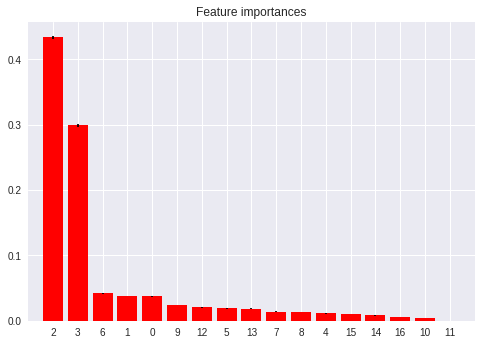

In [42]:
importances = clf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X_test.columns
print(feature_names)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [0]:
rf_small = RandomForestClassifier(n_estimators=2, max_depth = 3)
rf_small.fit(X_train, y_train)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_small.estimators_[0]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_small.estimators_[0]

# Export the image to a dot file
#class_names = y_train
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [0]:
# GRID SEARCH
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# get some data
X_train, X_test, y_train, y_test = get_train_test()

# build a classifier
clf = RandomForestClassifier(n_estimators=1)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV took 290.08 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.623 (std: 0.015)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.622 (std: 0.014)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.619 (std: 0.014)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 3}



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV took 985.59 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.639 (std: 0.017)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.636 (std: 0.017)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.635 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}



In [0]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
X_train, X_test, y_train, y_test = get_train_test()

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=94, bootstrap=False 
[CV]  n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=94, bootstrap=False, total=   3.7s
[CV] n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=94, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=94, bootstrap=False, total=   5.6s
[CV] n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=94, bootstrap=False 
[CV]  n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=94, bootstrap=False, total=   5.6s
[CV] n_estimators=2, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.8s
[CV] n_estimators=2, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.4s
[CV] n_estimators=2, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2, min_samples_split=10, 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 24.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=2)

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 73,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 5}

In [0]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 7, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['entropy', 'gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion}

print(random_grid)

{'n_estimators': [5, 6, 7], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 57, 105, 152, 200, None], 'min_samples_split': [2, 5, 10, 50], 'min_samples_leaf': [1, 2, 4, 10], 'bootstrap': [True, False], 'criterion': ['entropy', 'gini']}


In [0]:
X_train, X_test, y_train, y_test = get_train_test()

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=7, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy, bootstrap=False 


In [0]:
rf_random.best_params_